In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<AxesSubplot:title={'center':'Correlation with price'}>

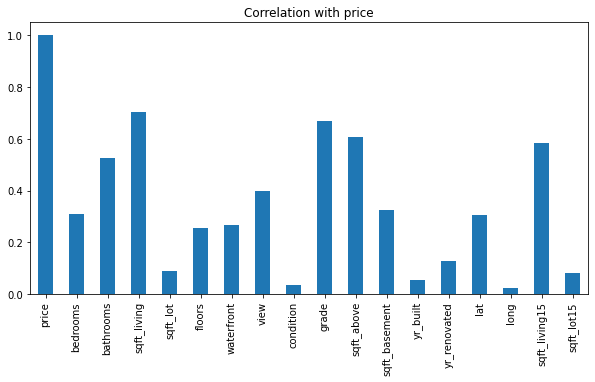

In [6]:
df.corrwith(df['price']).plot.bar(figsize=(10,5), title='Correlation with price')


In [22]:
X = df.drop(['price'],axis=1)
y  = df['price']    


In [23]:
import xgboost as xgb

In [24]:
data_matrix = xgb.DMatrix(X,y)

In [25]:
params = {
    'learning_rate' : .01,
    'max_depth' : 15,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics=['rmse','mae']
)
results

,train-rmse-mean,train-rmse-std,train-mae-mean,train-mae-std,test-rmse-mean,test-rmse-std,test-mae-mean,test-mae-std
0,646938.562500,2751.464307,534771.375000,195.870061,647064.708333,5549.481691,534792.291667,395.889512
1,640897.354167,2735.363615,529507.812500,194.940382,641164.416667,5581.866734,529548.520833,395.987444
2,634916.062500,2721.628247,524298.937500,194.845632,635319.479167,5618.449174,524361.708333,394.772697
3,628998.604167,2705.581896,519139.489583,193.081799,629544.250000,5660.534638,519227.479167,401.081897
4,623139.166667,2691.190960,514033.208333,191.003450,623825.833333,5694.387530,514143.895833,403.815831
...,...,...,...,...,...,...,...,...
495,23087.317708,439.831707,14653.649414,146.170167,133500.505208,5897.578973,68591.697917,1240.096037
496,23026.392578,436.800879,14613.680013,143.360940,133490.322917,5888.783066,68587.080729,1238.833172
497,22965.600260,439.308790,14572.792969,144.336765,133480.947917,5881.124503,68581.893229,1237.152157
498,22901.043620,443.158379,14530.087240,145.851523,133471.710938,5872.578593,68576.710938,1236.779529


<AxesSubplot:>

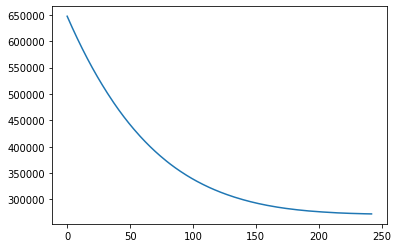

In [11]:
results['test-rmse-mean'].plot()

In [12]:
grid_params = [
    (max_depth, learning_rate, alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)
]

min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
    print(f'Current best params: {best_params}')

Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (5, 0.01, 10)
Current best params: (

### best_params

final run

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y,test_size=.3,random_state=1234)

In [28]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)

In [29]:
model = xgb.train(
    params,
    train_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    evals=[(test_matrix,'test')],
)
model.save_model('kc_house_model.xgb')

[0]	test-rmse:643354.37500
[1]	test-rmse:637537.68750
[2]	test-rmse:631794.00000
[3]	test-rmse:626114.25000
[4]	test-rmse:620468.12500
[5]	test-rmse:614919.37500
[6]	test-rmse:609382.43750
[7]	test-rmse:603935.81250
[8]	test-rmse:598511.00000
[9]	test-rmse:593127.93750
[10]	test-rmse:587808.75000
[11]	test-rmse:582538.00000
[12]	test-rmse:577341.56250
[13]	test-rmse:572160.87500
[14]	test-rmse:567041.25000
[15]	test-rmse:561967.00000
[16]	test-rmse:556975.31250
[17]	test-rmse:552010.00000
[18]	test-rmse:547106.87500
[19]	test-rmse:542259.87500
[20]	test-rmse:537462.25000
[21]	test-rmse:532693.18750
[22]	test-rmse:527999.12500
[23]	test-rmse:523337.43750
[24]	test-rmse:518740.71875
[25]	test-rmse:514191.78125
[26]	test-rmse:509716.37500
[27]	test-rmse:505289.00000
[28]	test-rmse:500892.28125
[29]	test-rmse:496505.12500
[30]	test-rmse:492212.68750
[31]	test-rmse:487950.93750
[32]	test-rmse:483722.75000
[33]	test-rmse:479580.12500
[34]	test-rmse:475468.65625
[35]	test-rmse:471409.06250
[3

load save model

In [30]:
saved_model = xgb.Booster()
saved_model.load_model('kc_house_model.xgb')

In [31]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639


In [32]:
saved_model.predict(xgb.DMatrix(X.head(2)))

array([232041.47, 517471.7 ], dtype=float32)

In [33]:
y[:2]

0    221900.0
1    538000.0
Name: price, dtype: float64

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

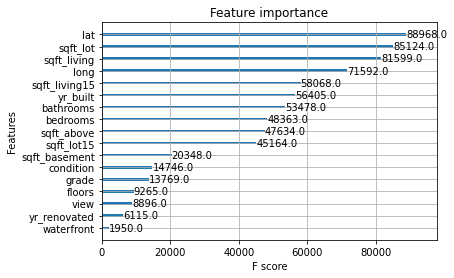

In [34]:
xgb.plot_importance(model)  # tells us which features are important

In [35]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

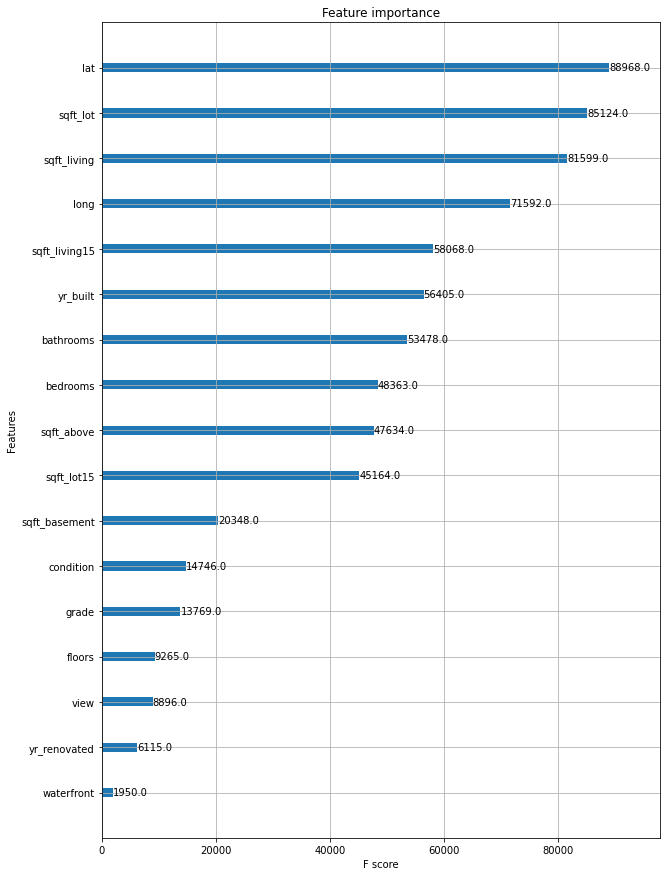

In [37]:
f,a = plt.subplots(figsize=(10,15))
xgb.plot_importance(model,ax=a) # tells us which features are important

### # flask application to predict house prices using this model